In [1]:
import at
import at.plot
import numpy as np
import matplotlib.pyplot as plt

ring = at.load_mat('./dba.mat', mat_key='RING')
arc = at.load_mat('./arc.mat', mat_key='ARC')

## Simple Tracking, Optics and Orbit

Now we will do some simple tracking through the lattice, and also show how to compute the optics and the orbit. 

First we need some particles to track, these must be in the format of ((6,N)) where 6 is the number of dimensions of AT (x,x',y,y',delta,ct) and N is the number of particles. This array can be manually created, but it is also desirable to generate a beam that is matched to the lattice. We can do this by generating the sigma correlation matrix using 'sigma_matrix'. The function will return a correlation matrix that can be used to generate a matched beam for the lattice you provide it. However there are some interesting things to be aware of, e.g.

In [4]:
ring.disable_6d()
#sig_mat = at.sigma_matrix(ring)

We have give a lattice with radiation off and asked for a correlation matrix. However, the emittances of a lattice with no radiation are 0 in x and y. Therefore we must provide the emittances that we want.

In [5]:
sig_mat = at.sigma_matrix(ring, emitx=100e-12, emity=1e-12)
sig_mat

/mnt/multipath-shares/machfs/carver/pyat_dev/at/pyat/at/tracking/particles.py:107: AtWarning: Monochromatic beam: no energy spread
  warn(AtWarning('Monochromatic beam: no energy spread'))


array([[ 2.45833315e-09, -2.04689477e-23,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.04689477e-23,  4.06779692e-12,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.68609587e-11,
        -1.94441707e-25,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.94441707e-25,
         5.93086086e-14,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Due to the fact that the rad is off. We only have correlations for x,x' and y,y' and nothing in the longitudinal plane. But we can switch rad on and compare the difference. Here you may notice that we don't need to give the emittances, that is because if radiation is on and no emittances are specified, it will take the result from envelope_parameters. If you want a beam with veritcal emittance, you can also still specify it. There are many different cases that can be seen in the help, but the exception that is raised if something is missing is quite explanatory. 

In [4]:
sig_mat_rad_on = at.sigma_matrix(ring.radiation_on(copy=True), emity=10e-12)
sig_mat_rad_on

array([[ 1.82894536e-07, -8.39705701e-13, -1.22871016e-25,
         2.26634148e-27, -1.27175732e-10, -1.36812156e-11],
       [-8.39697743e-13,  3.02251361e-10,  9.18201510e-28,
         4.48118529e-29,  3.02513865e-12,  6.77303589e-13],
       [-9.21612279e-26,  2.20460508e-27,  1.68601226e-10,
        -3.25445048e-15,  2.00417987e-22,  1.16284359e-22],
       [ 5.84838327e-27, -1.39900740e-28, -3.25445048e-15,
         5.93115560e-13, -1.27181895e-23, -7.38014039e-24],
       [-1.27178191e-10,  3.04253687e-12, -6.38420191e-23,
         4.97333565e-24,  2.76400551e-07,  3.98748048e-08],
       [-1.43909039e-11,  7.01205669e-13, -1.35669731e-22,
        -1.05699409e-22,  3.98748048e-08,  6.20615783e-06]])

Now that we have the matrix we can generate a beam using 'beam'.

In [5]:
nparts = 50000
parts = at.beam(nparts, sig_mat_rad_on)
print(parts.shape)

h, v, delta
(6, 50000)


0.0024886698843600017


(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 7.000e+00,
        7.000e+00, 6.000e+00, 1.400e+01, 1.500e+01, 2.100e+01, 2.500e+01,
        3.000e+01, 3.800e+01, 4.800e+01, 6.100e+01, 8.600e+01, 1.060e+02,
        1.140e+02, 1.380e+02, 1.610e+02, 2.000e+02, 2.480e+02, 2.620e+02,
        2.870e+02, 4.030e+02, 4.050e+02, 5.030e+02, 5.840e+02, 6.510e+02,
        6.930e+02, 7.780e+02, 8.890e+02, 1.040e+03, 1.057e+03, 1.107e+03,
        1.237e+03, 1.334e+03, 1.365e+03, 1.459e+03, 1.560e+03, 1.528e+03,
        1.664e+03, 1.636e+03, 1.627e+03, 1.630e+03, 1.615e+03, 1.718e+03,
        1.676e+03, 1.674e+03, 1.593e+03, 1.507e+03, 1.470e+03, 1.334e+03,
        1.241e+03, 1.241e+03, 1.104e+03, 1.065e+03, 9.680e+02, 8.730e+02,
        7.920e+02, 6.810e+02, 6.450e+02, 5.470e+02, 4.930e+02, 4.520e+02,
        3.750e+02, 3.170e+02, 2.880e+02, 2.610e+02, 2.060e+02, 1.770e+02,
        1.490e+02, 9.900e+01, 7.700e+0

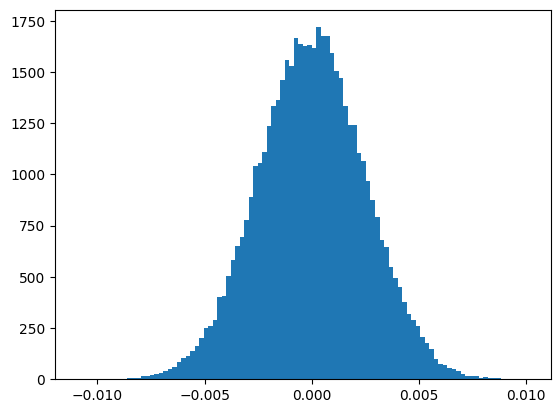

In [6]:
coord=5
print(np.std(parts[coord,:]))
plt.hist(parts[coord,:], bins=100)


Now let's do some tracking. but to make it easier we can start with only a single particle.

In [7]:
p_in = np.array([[1e-3, 0., 0., 0., 0., 0.]]).T #must be floats not ints
p_in.shape

(6, 1)

We need to use the function lattice_pass. We must define the refpts in the lattice where we want to save the output. And we also want to specify nturns. There are two ways of tracking, either you use nturns=1 within a for loop, this has the benefit of allowing you to perform your own TbT analysis and save relevant parameters only. Or you can tracking for many turns, look at the full coordinates of the whole tracking, and perform the post processing later.

In [8]:
at.lattice_pass?

Signature:
at.lattice_pass(
    lattice: Iterable[at.lattice.elements.Element],
    r_in,
    nturns: int = 1,
    refpts: Union[Type[at.lattice.elements.Element], at.lattice.elements.Element, Callable[[at.lattice.elements.Element], bool], str, NoneType, int, Sequence[int], bool, Sequence[bool], at.lattice.utils.RefptsCode] = <RefptsCode.End: 'End'>,
    **kwargs,
)
Docstring:
:py:func:`lattice_pass` tracks particles through each element of a lattice
calling the element-specific tracking function specified in the Element's
*PassMethod* field.

Parameters:
    lattice:                list of elements
    r_in:                   (6, N) array: input coordinates of N particles.
      *r_in* is modified in-place and reports the coordinates at
      the end of the element. For the best efficiency, *r_in*
      should be given as F_CONTIGUOUS numpy array.
    nturns:                 number of turns to be tracked
    refpts:                 Selects the location of coordinates output.
      See

In [9]:
# Method 1, the output of the tracking is a big array with shape (6, N, R, T)
# where 6 is the particle coordinate, N is the particle index, R is the element index, 
# and T is the turn number
pout = at.lattice_pass(ring, p_in, refpts=np.arange(len(ring)), nturns=200)

In [10]:
print(pout.shape)

(6, 1, 776, 200)


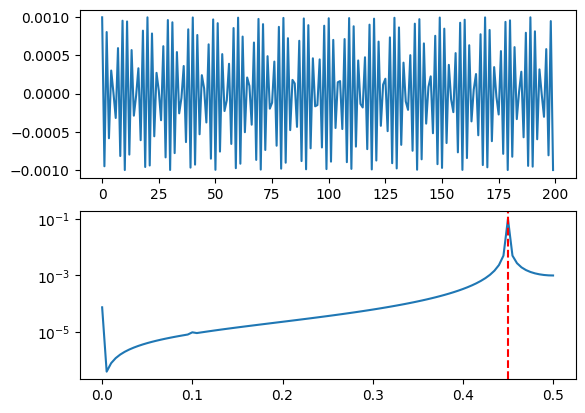

In [11]:
tunex, tuney = ring.get_tune()
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(pout[0,0,0,:])
ax2.semilogy(np.fft.rfftfreq(pout.shape[-1]), np.abs(np.fft.rfft(pout[0,0,0,:])))
ax2.axvline(tunex, color='r', linestyle='dashed')
plt.show()


An important note, back to pointers again! Look at the following output

In [12]:
print(p_in)

[[9.50646749e-04]
 [1.26302572e-05]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [6.68638072e-04]]


Our initial particle has been modified. If you want to avoid this, you can use p_in.copy() when giving the input to the lattice_pass function. Or we can run the tracking a little differently

In [13]:
p_in = np.array([[1e-3, 0., 0., 0., 0., 0.]]).T #must be floats not ints
p_in = np.zeros((6,3))
p_in[0,:] = np.array([1e-4,1e-3,3e-3])
n_turns=200
x_data = np.zeros((p_in.shape[1], n_turns))
xp_data = np.zeros((p_in.shape[1], n_turns))
for i in np.arange(n_turns):
    _ = at.lattice_pass(ring, p_in, nturns=1)
    x_data[:, i] = p_in[0,:]
    xp_data[:, i] = p_in[1,:]

Text(0, 0.5, 'xp')

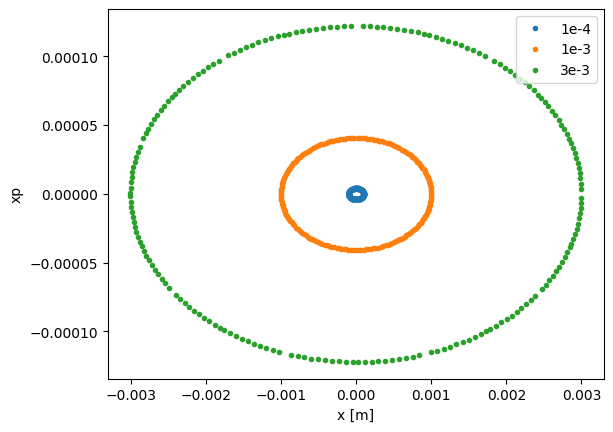

In [14]:
plt.plot(x_data[0,:], xp_data[0,:], linestyle='None', marker='.', label='1e-4')
plt.plot(x_data[1,:], xp_data[1,:], linestyle='None', marker='.', label='1e-3')
plt.plot(x_data[2,:], xp_data[2,:], linestyle='None', marker='.', label='3e-3')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('xp')

The following section is very important. As we saw, we have the ability to enable or disable 6d motion. When computing the linear optics or the orbit, the 'get_optics' and 'find_orbit' functions will automatically select the most appropriate method to use out of the methods available. 

> at.linopt2

> at.linopt4 / at.find_orbit4

> at.linopt6 / at.find_orbit6

for 2, 4 and 6 dimensional tracking respectively. One can also specifically call other methods in order to speed up computation (for example if you are doing uncoupled matching, it is faster to call at.linopt2 rather than do the full 6d computation)

In [15]:
ring.disable_6d()
s_positions = ring.get_s_pos(refpts=np.arange(len(ring)))
orbit0_4, orbit_4 = ring.find_orbit(refpts=np.arange(len(ring)))
ring.enable_6d()
orbit0_6, orbit_6 = ring.find_orbit(refpts=np.arange(len(ring)))
print(orbit_4.shape)

(776, 6)


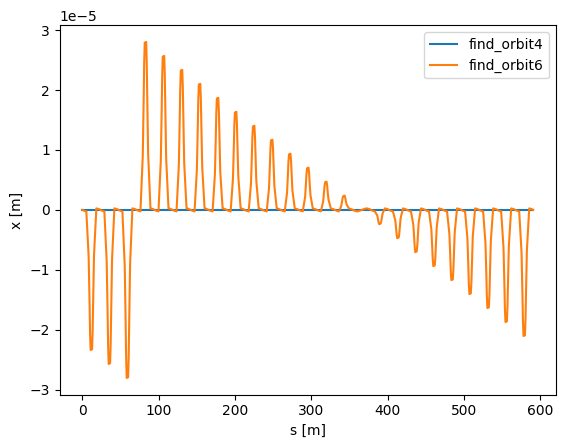

In [16]:
plt.plot(s_positions, orbit_4[:,0], label='find_orbit4')
plt.plot(s_positions, orbit_6[:,0], label='find_orbit6')
plt.legend()
plt.xlabel('s [m]')
plt.ylabel('x [m]')
plt.show()


In [17]:
at.get_optics?

Signature:
at.get_optics(
    ring: 'Lattice',
    refpts: 'Refpts' = None,
    dp: 'float' = None,
    method: 'Callable' = <function linopt6 at 0x1491d0f15820>,
    **kwargs,
)
Docstring:
Linear analysis of a fully coupled lattice

Parameters:
    ring:                   Lattice description.
    refpts:                 Elements at which data is returned.
      It can be:

      1. an integer in the range [-len(ring), len(ring)-1]
         selecting the element according to python indexing rules.
         As a special case, len(ring) is allowed and refers to the end
         of the last element,
      2. an ordered list of such integers without duplicates,
      3. a numpy array of booleans of maximum length len(ring)+1,
         where selected elements are :py:obj:`True`.
    dp:                     Momentum deviation.
    method (Callable):      Method for linear optics:

      :py:obj:`~.linear.linopt2`: no longitudinal motion, no H/V coupling,

      :py:obj:`~.linear.linopt4`: no

In [18]:
ring.disable_6d()
ld0_4d, bd_4d, ld_4d = at.get_optics(ring, refpts=np.arange(len(ring)), method=at.linopt2)
ring.enable_6d()
ld0_6d, bd_6d, ld_6d = at.get_optics(ring, refpts=np.arange(len(ring)))
ld0_6db, bd_6db, ld_6db = at.get_optics(ring, refpts=np.arange(len(ring)))


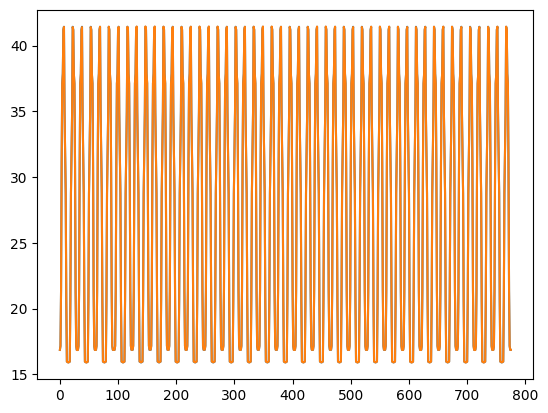

In [19]:
plt.plot(ld_4d.beta[:,1])
plt.plot(ld_6d.beta[:,1])

In [20]:
at.find_orbit4?

Signature:
at.find_orbit4(
    ring: at.lattice.lattice_object.Lattice,
    dp: float = None,
    refpts: Union[Type[at.lattice.elements.Element], at.lattice.elements.Element, Callable[[at.lattice.elements.Element], bool], str, NoneType, int, Sequence[int], bool, Sequence[bool], at.lattice.utils.RefptsCode] = None,
    *,
    dct: float = None,
    df: float = None,
    orbit: numpy.ndarray = None,
    keep_lattice: bool = False,
    **kwargs,
)
Docstring:
Gets the 4D closed orbit for a given dp

Finds the closed orbit in the 4-d transverse phase space by numerically
solving for a fixed point of the one turn map M calculated with
:py:func:`.internal_lpass`.

.. math:: \begin{pmatrix}x \\ p_x \\ y \\ p_y \\ dp \\ c\tau_2\end{pmatrix}
   =\mathbf{M} \cdot
   \begin{pmatrix}x \\ p_x \\ y \\ p_y \\ dp \\ c\tau_1\end{pmatrix}

under the **CONSTANT MOMENTUM** constraint **dp** and with **NO**
constraint on the 6-th coordinate :math:`c\tau`

Important:
    :py:func:`find_orbit4` imposes a con

We can easily modify the tunes and chromaticity by using the built in functions. First we can use 'get_tunes' and 'get_chrom' to acquire these values. 

In [21]:
qx, qy, qs = at.get_tune(ring)
print(qx,qy,qs)

0.4497677209814676 0.8237510706933476 0.013248720495888577


In [22]:
Qpx, Qpy, Qpz = at.get_chrom(ring)
print(Qpx, Qpy, Qpz)

-26.145027859720813 -26.210932980183223 0.18173381595959232


Let's adjust the chromaticity to something a bit nicer.

In [23]:
#print(at.get_value_refpts(ring, at.Corrector, 'KickAngle'))
#ring[-1].KickAngle = [0, 0] #We have to remove the corrector we powered because otherwise the lattice becomes unstable
ring.enable_6d()
at.fit_chrom(ring, at.get_uint32_index(ring, 'SF*'), at.get_uint32_index(ring,'SD*'), [0,0])


Fitting Chromaticity...
Initial value [-26.14502786 -26.21093298]
iter# 0 Res. 2.7347193442534277e-06
iter# 1 Res. 5.359769893106774e-15
Final value [7.32091021e-08 4.44140154e-10] 



In [24]:
at.get_chrom(ring)

array([ 7.32091021e-08,  4.44140154e-10, -1.70385062e-03])

### MATCHING

So we want to do some matching! The final piece of the introductory puzzle. Lets some back to our arc cell. Then lets ruin it a bit for fun in order to give us something to match back to.

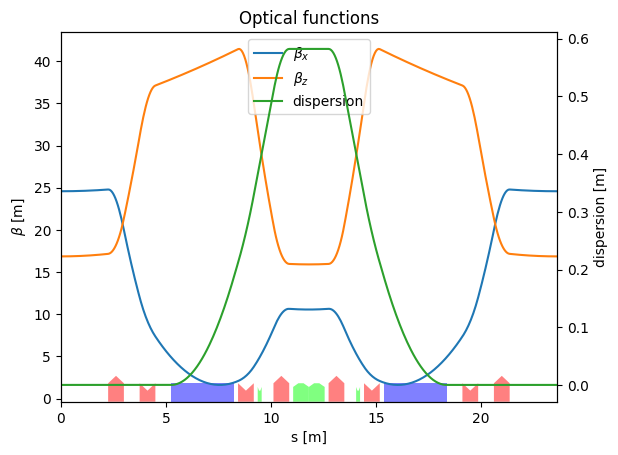

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [25]:
arc.plot_beta()

We can put some errors to make it a bit messy, then rematch to these values. However, we can use transfer line mode to speed up the matching and use only half of the cell as it is symmetric. First we need to save the initial optics, which we can use as input into the matching

In [26]:
ld0, bd, ld = at.get_optics(arc)

In [27]:
ld0

rec.array(([-2.46666011e-15, -7.38098906e-15], [24.58333148, 16.86095871], [0., 0.], [[[2.45833315e+01, 2.46666011e-15, 0.00000000e+00, 0.00000000e+00], [2.46666011e-15, 4.06779692e-02, 0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 1.68609587e+01, 7.38098906e-15], [0.00000000e+00, 0.00000000e+00, 7.38098906e-15, 5.93086086e-02]]], [[4.95815807e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00], [4.97495253e-16, 2.01687801e-01, 0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 4.10620977e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 1.79751875e-15, 2.43533588e-01]], [-1.76362232e-06,  3.02779028e-18,  0.00000000e+00,  0.00000000e+00], [0., 0., 0., 0., 0., 0.], [[  0.17496079, -24

[-1.76362232e-06  3.02779028e-18  0.00000000e+00  0.00000000e+00]
[-1.76362232e-06  3.02779028e-18  0.00000000e+00  0.00000000e+00]


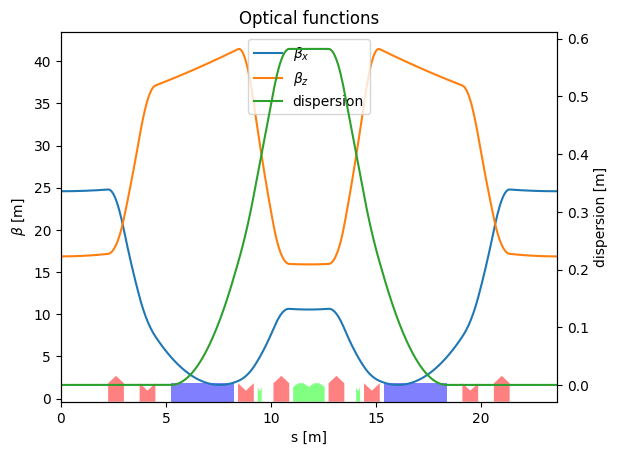

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [28]:
half_arc = arc[:at.get_uint32_index(arc, 'BPM_CellCenter')[0]]
print(ld0.dispersion)
#ld0.dispersion[0] = 1e-1
print(ld0.dispersion)

#This uses plot_beta in transfer_line mode. When you provide twiss_in, you set
# the initial optics functions and then progress them in one pass through your lattice
arc.plot_beta(twiss_in=ld0)

In [29]:
half_arc

Lattice([Drift('DR_01', 2.25), Quadrupole('QF1', 0.75, 0.38041), Drift('DR_02', 0.75), Quadrupole('QD2', 0.75, -0.2708), Drift('DR_03', 0.75), Dipole('Bend', 3.0, 0.12566370614359174, 0.0), Drift('DR_04', 0.1875), Quadrupole('QD3', 0.75, -0.33319), Drift('DR_05', 0.1875), Sextupole('SD', 0.1875, -0.1), Drift('DR_06', 0.5625), Quadrupole('QF4', 0.75, 0.4588), Drift('DR_07', 0.1875), Sextupole('SF', 0.75, 0.1)], name='', energy=3000000000.0, particle=Particle('relativistic'), periodicity=25, beam_current=0.0, nbunch=1)

In [30]:
import random
quad_refs = at.get_uint32_index(half_arc, at.Quadrupole)
sext_refs = at.get_uint32_index(half_arc, at.Sextupole)
for quad_ind in quad_refs:    
    half_arc[quad_ind].K *= 1 - random.randint(-50,50)/100
    
for sext_ind in sext_refs:    
    half_arc[sext_ind].H *= 1 - random.randint(-50,50)/100

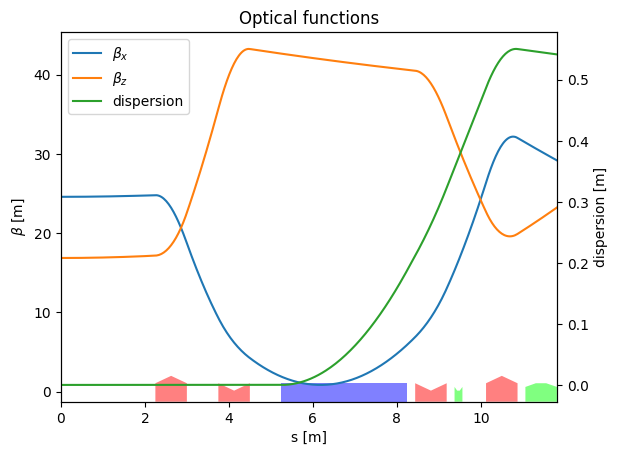

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [31]:
half_arc.plot_beta(twiss_in=ld0)

Now we have a messed up lattice, some initial optics parameters, and a rough idea on what we want it to look like again. So lets try and match it.

We must define our Constraints (or Goals) and our Variables.

Possible Constraint containers:

Constraints - Generic container for user defined functions<br>
ElementConstraints - Constraints related to attributes of lattice elements <br>
EnvelopeConstraints - Constraints for values that can be found with envelope_parameters <br>
LinoptConstraints - Constraints for values that can be found with linopt output <br>
OrbitConstraints - Constraints relating to the orbit

Possible Variable containers:

Variable - Generic container for user defined variables <br>
ElementVariable - Variable related to attributes of lattice elements <br> 

We can start with some simple linear optics constraints, which we can recover using the quadrupoles and sextupoles strengths

In [32]:
at.Variable?

Init signature:
at.Variable(
    setfun: 'Callable',
    getfun: 'Callable',
    name: 'str' = '',
    bounds: 'tuple[float, float]' = (-inf, inf),
    fun_args: 'tuple' = (),
    **fun_kwargs,
)
Docstring:     
A :py:class:`Variable` is a scalar value acting on a lattice through the
user-defined functions setfun and getfun

Parameters:
    setfun:     User-defined function for setting the Variable. Called as:

      :code:`setfun(ring, value, *args, **kwargs)`

      where :code:`value` is the scalar value to apply

      The positional and keyword parameters come from the
      :py:class:`Variable` initialisation
    getfun:     User-defined function for retrieving the actual value of
      the variable: Called as:

      :code:`value = getfun(ring, *args, **kwargs)`

      The positional and keyword parameters come from the
      :py:class:`Variable` initialisation
    name:       Name of the Variable; Default: ``''``
    bounds:     Lower and upper bounds of the variable value
    

In [33]:
# First we initialise the constraint type by passing the ring and information about the setup
# These are the arguments that are passed to linopt when computing the optics
constr = at.LinoptConstraints(half_arc, dp=0.0, coupled=False, twiss_in=ld0)

In [34]:
#Now we can add our optics constraints.
# Weights can also be applied here. See the help of constr.add. Also if phase advance is
# being used. UseInteger should be True. 
constr.add('beta', 15, refpts=len(half_arc), index=0) #beta_x at end of half_cell = 15m
constr.add('beta', 10, refpts=len(half_arc), index=1) # beta_y at end of half_cell = 10m
constr.add('dispersion', 0.6, refpts=len(half_arc), index=0) # dispersion_x at end of half cell is 0.6m
constr.add('dispersion', 0., refpts=len(half_arc), index=1, weight=1/10000) # dispersion_x prime at end of half cell is 0
constr.add('alpha', 0, refpts=len(half_arc), index=0, weight=1/1000) #alpha_x is 0 at end of cell
constr.add('alpha', 0, refpts=len(half_arc), index=1, weight=1/1000) #alpha_y is 0 at end of cell

In [35]:
all_constraints = [constr]

In [36]:
all_quad_vars = ['QF1','QD2', 'QD3', 'QF4'] #Quadrupole names that we want to add
all_sext_vars = ['SF','SD'] #Sextupole names that we want to do
all_vars = []

# For each quadrupole family, create an element variable for the strength 
# and add it to our list of variables
for var in all_quad_vars:
    all_vars.append(at.ElementVariable(at.get_uint32_index(half_arc, var), 'K'))
    
# Similarly for sextupole
for var in all_sext_vars:
    all_vars.append(at.ElementVariable(at.get_uint32_index(half_arc, var), 'H'))


In [37]:
new_lat = at.match(half_arc, all_vars, all_constraints)


6 constraints, 6 variables, using method lm

Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 159, initial cost 2.8152e+06, final cost 2.5954e+01, first-order optimality 6.92e+02.

        Name      Initial          Final           Target        Residual

      beta_0    2.918454e+01    1.137523e+01    1.500000e+01   -3.624766e+00
      beta_1    2.323164e+01    1.618544e+01    1.000000e+01    6.185445e+00
dispersion_0    5.415663e-01    5.827142e-01    6.000000e-01   -1.728578e-02
dispersion_1   -9.413689e-03    6.276248e-05    0.000000e+00    6.276248e-05
     alpha_0    1.460764e+00    3.374874e-04    0.000000e+00    3.374874e-04
     alpha_1   -1.867428e+00    2.880703e-05    0.000000e+00    2.880703e-05

        Name      Initial          Final        Variation

                4.869248e-01    3.849324e-01   -1.019924e-01
               -3.547480e-01   -2.716760e-01    8.307202e-02
               -2.498925e-01   -3.342996e-01   -8.440708e-02
     

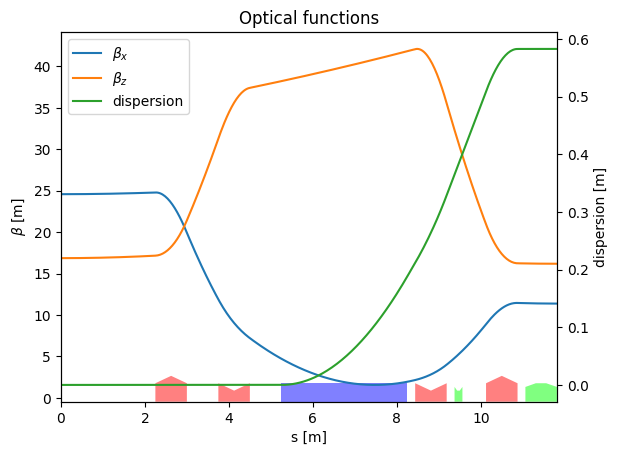

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [38]:
new_lat.plot_beta(twiss_in=ld0)

In [39]:
constr.add?

Signature:
constr.add(
    param,
    target,
    refpts: 'Optional[Refpts]' = None,
    index: 'Optional[Union[int, slice]]' = None,
    name: 'Optional[str]' = None,
    **kwargs,
)
Docstring:
Add a target to the LinoptConstraints container

Parameters:
    param:         2 possibilities:

      * parameter name: see :py:func:`.linopt6` for the
        name of available parameters. In addition to local
        optical parameters, ``'tunes'`` and ``'chroms'``
        are allowed.
      * user-supplied parameter evaluation function:

        :code:`value = param(lindata, tune, chrom)`

        ``lindata`` contains the optics parameters at all the
        specified refpoints
        ``value`` is the constrained parameter value
        (scalar or array).
    target:       desired value.
    refpts:       location of the constraint. Several locations may be
      given to apply the same constraint at several points.
    index:        index in the parameter array. If :py:obj:`None`,
      

## Dynamic Aperture

We have several build in functions for the computation of the DA and lifetime. 

In [12]:
at.get_acceptance?

Signature:
at.get_acceptance(
    ring: at.lattice.lattice_object.Lattice,
    planes,
    npoints,
    amplitudes,
    nturns: Union[int, NoneType] = 1024,
    refpts: Union[Type[at.lattice.elements.Element], at.lattice.elements.Element, Callable[[at.lattice.elements.Element], bool], str, NoneType, int, Sequence[int], bool, Sequence[bool], at.lattice.utils.RefptsCode] = None,
    dp: Union[float, NoneType] = None,
    offset: Sequence[float] = None,
    bounds=None,
    grid_mode: Union[at.acceptance.boundary.GridMode, NoneType] = <GridMode.RADIAL: 0>,
    use_mp: Union[bool, NoneType] = False,
    verbose: Union[bool, NoneType] = True,
    divider: Union[int, NoneType] = 2,
    shift_zero: Union[float, NoneType] = 1e-06,
    start_method: Union[str, NoneType] = None,
)
Docstring:
Computes the acceptance at ``repfts`` observation points

Parameters:
    ring:           Lattice definition
    planes:         max. dimension 2, Plane(s) to scan for the acceptance.
      Allowed values ar

In [44]:
ring.enable_6d()
bound, surv, track = at.get_acceptance(ring, ('x','xp'), (20,20), (40e-3,1.5e-3))


56 cpu found for acceptance calculation
Single process acceptance calculation selected...
Consider use_mp=True for parallelized computations
The estimated load for grid mode is 400.0
The estimated load for recursive mode is 200.0
GridMode.RECURSIVE is recommended

Running grid boundary search:
Element DR_01, obspt=0
The grid mode is GridMode.RADIAL
The planes are ['x' 'xp']
Number of steps are [20 20]
The maximum amplitudes are [0.04   0.0015]
The maximum boundaries are ((1e-06, 1.0), (3.141592653589793, 0.0))
The initial offset is [ 4.38846527e-09 -6.32627222e-08  0.00000000e+00  0.00000000e+00
 -3.86711867e-05  1.89555618e-06] with dp=None
Calculation took 111.48328399658203


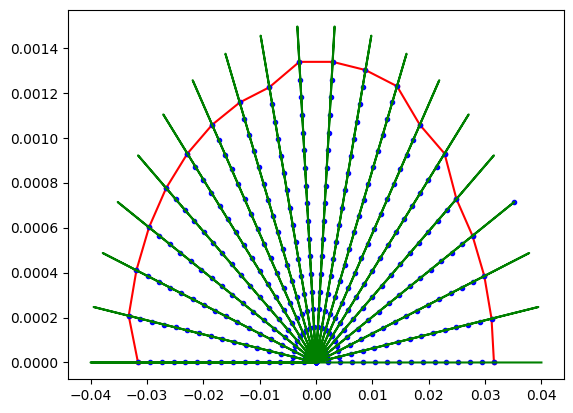

In [45]:
plt.plot(*bound,marker='.', color='r')
plt.plot(*surv,marker='.',linestyle='None', color='b')
plt.plot(*track, color='g')
plt.show()